In [2]:
import numpy as np

# Regressão Linear

In [3]:
np.random.seed(42) 
m = 100  
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1)  

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

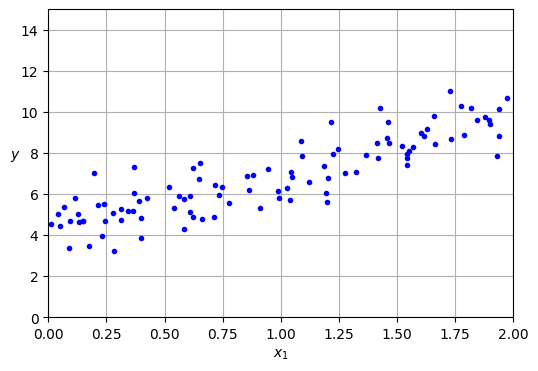

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [10]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

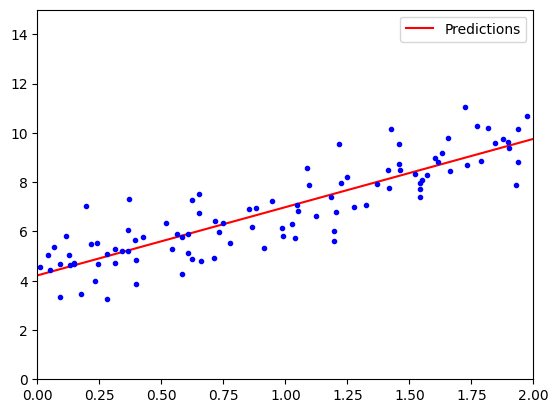

In [26]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [28]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [29]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [30]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    # Minimos Quadrados
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [31]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# Gradiente Descendente

## Em lote

In [34]:
eta = 0.1   # Taxa de aprendizado
n_interactions = 1000
m = 100

theta = np.random.rand(2,1)

In [35]:
for iteration in range(n_interactions):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [36]:
theta

array([[4.21509616],
       [2.77011339]])

## Estocático